<h1> This sheet caculates the preliminary volume of hydrocarbons during exploration</h1>

<h4 style=font-family:"times new roman"> Please provide the following inputs for calculations:
    <li> Gross-rock-volume GRV (km^3) 
    <li> Porosity (in 00.00 format as it is a percentage)
    <li> Hydrocarbon saturation 1-Wi (in 00.00 format as it is a percentage)
    <li> net-to-gross (in 00.00 format as it is a percentage)
    <li> recovery factor (in 00.00 format as it is a percentage)
    <li> Bo (formation volume factor = 1.05 + (N × 0.05), where N = number of ft3 of gas produced per bbl of oil (gas-oil ratio or GOR). For example, if a well has a GOR of 1,000, then Boi = 1.05 + (10 × 0.05) = 1.1)

</h4>
<h4> For calculation of gas volumes please add:
    <li> Bg (in rcf/scf, usually it's between 0.003 and 0.01)
</h4>

<h5 style=font-weight: normal;> First, we import necessary libraries </h5>

In [1]:
from scipy.stats import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2> Oil calculations

<h4> You can extract GRV directly from the interpretation software, or use the area and thickness. Insert the mean and the standard variation of the data.

In [2]:
#iterations is the number of times you wish to run the simulation. The higher the better. Remember that higher numbers need more computing time.
iterations = 1000

#Area = norm(200,50).rvs(iterations)
#Thickness = norm(100,25).rvs(iterations)

GRV = norm(2, 0.5).rvs(iterations)
POR = norm(.2,.03).rvs(iterations)
HS = norm(.85,.2).rvs(iterations)
NTG = norm(0.7,.2).rvs(iterations)
RF = norm(0.4,.1).rvs(iterations)
BO= norm(1.1,.0001).rvs(iterations)

stoiip = 6.289814e+9*GRV*NTG*POR*HS*RF/BO * 0.000001



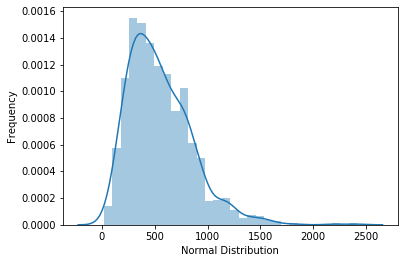

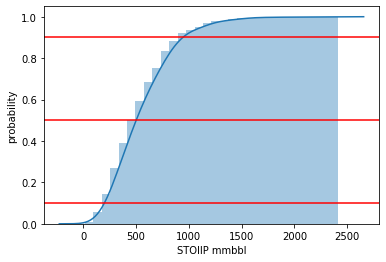

In [6]:
#plot1
plot1=sns.distplot(stoiip, 
                   kde=True, 
                   norm_hist=True, 
                   #color='skyblue',
                   #hist_kws={"linewidth": 15,'alpha':1}
                  )
plot1.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.figure()

#plot2
plot2=sns.distplot(stoiip,
                   hist_kws=dict(cumulative=True),
kde_kws=dict(cumulative=True))

plot2.set(xlabel='STOIIP mmbbl', ylabel='probability')
plot2.axhline(y=0.9, label='P10', color="red")
plot2.axhline(y=0.5, label='P50', color="red")
plot2.axhline(y=0.1, label='P90', color="red")

plt.show()

In [ ]:
#to calculate the P90, P50 and P10 values (90%, 50% and 10% probabilities to have the specified volume):

stoiip_sorted=np.sort(stoiip)
x10=int(iterations/10*9)
x50=int(iterations/2)
x90=int(iterations/10)

p10=stoiip_sorted[x10]
p50=stoiip_sorted[x50]
p90=stoiip_sorted[x90]

print("P10 value is: ", p10, "mmbbl")
print("P50 value is: ", p50, "mmbbl")
print("P90 value is: ", p90, "mmbbl")


<h2> Gas calculations

In [ ]:
#iterations is the number of times you wish to run the simulation. The higher the better. Remember that higher numbers need more computing time.
iterations = 10000
#Area = norm(200,50).rvs(iterations)
#Thickness = norm(100,25).rvs(iterations)
GRV = norm(2, 0.5).rvs(iterations)
POR = norm(.2,.03).rvs(iterations)
GS = norm(.85,.2).rvs(iterations)
NTG = norm(0.7,.2).rvs(iterations)
RF = norm(0.4,.1).rvs(iterations)
Bg= norm(0.003,.0002).rvs(iterations)

#ogiip = 3.531467e10*GRV*NTG*POR*HS*RF/BO * 0.000000000001
ogiip = 0.04*GRV*NTG*POR*GS*RF/Bg


In [ ]:
#plot3
plot3=sns.distplot(ogiip, 
                   kde=True, 
                   norm_hist=True, 
                   #color='skyblue',
                   #hist_kws={"linewidth": 15,'alpha':1}
                  )
plot3.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.figure()

#plot4
plot4=sns.distplot(ogiip,
                   hist_kws=dict(cumulative=True),
kde_kws=dict(cumulative=True))

plot4.set(xlabel='OGIIP tcf', ylabel='probability')
plot4.axhline(y=0.9, label='P10', color="red")
plot4.axhline(y=0.5, label='P50', color="red")
plot4.axhline(y=0.1, label='P90', color="red")

#plot2.hlines(y=0.1, xmin=0, xmax=300, linestyles='dashed', label='P10', color="red")


#Axes.axvline(self, x=0, ymin=0, ymax=1, **kwargs)[source]
plt.show()

In [ ]:
ogiip_sorted=np.sort(ogiip)
x10=int(iterations/10*9)
x50=int(iterations/2)
x90=int(iterations/10)

p10=ogiip_sorted[x10]
p50=ogiip_sorted[x50]
p90=ogiip_sorted[x90]

print("P10 value is: ", p10, "tcf")
print("P50 value is: ", p50, "tcf")
print("P90 value is: ", p90, "tcf")